# Groupby operations

Some imports:

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn
except ImportError:
    pass

pd.options.display.max_rows = 10

## Some 'theory': the groupby operation (split-apply-combine)

The "group by" concept: we want to **apply the same function on subsets of your dataframe, based on some key to split the dataframe in subsets**

This operation is also referred to as the "split-apply-combine" operation, involving the following steps:

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [2]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,key,data
0,A,0
1,B,5
2,C,10
3,A,5
4,B,10
5,C,15
6,A,10
7,B,15
8,C,20


Using the filtering and reductions operations we have seen in the previous notebooks, we could do something like:


    df[df['key'] == "A"].sum()
    df[df['key'] == "B"].sum()
    ...

But pandas provides the `groupby` method to do this:

In [3]:
df.groupby('key').aggregate(np.sum)  # 'sum'

,data
key,
A,15
B,30
C,45


In [4]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


And many more methods are available. 

## And now applying this on some real data

We go back to the titanic survival data:

In [5]:
df = pd.read_csv("titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<div class="alert alert-success">
    <b>EXERCISE</b>: Using groupby(), calculate the average age for each sex.
</div>

In [7]:
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate the average survival ratio for all passengers.
</div>

In [11]:
df["survival_ratio"]= len(df[df["Survived"]==1]) / len(df)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survival_ratio
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.383838
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.383838
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.383838
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.383838
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.383838
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.383838
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.383838
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.383838


<div class="alert alert-success">
    <b>EXERCISE</b>: Calculate this survival ratio for all passengers younger that 25 (remember: filtering/boolean indexing).
</div>

In [116]:
ratio_under_25= df[(df["Age"]<=25)]
(len(ratio_under_25) - len(ratio_under_25[ratio_under_25["Survived"] == 0])) / len(ratio_under_25)

0.4119601328903654

<div class="alert alert-success">
    <b>EXERCISE</b>: Is there a difference in this survival ratio between the sexes? (tip: write the above calculation of the survival ratio as a function)
</div>

In [157]:
female= df[df["Sex"] == "female"]
def ratio1 (female):
    ratio1 = (len(female) - len(female[female["Survived"]==0])) / len(female)
    return ratio1

male= df[df["Sex"] == "male"]
def ratio2 (male):
    ratio2 = (len(male) - len(male[male["Survived"]==0])) / len(male)
    return ratio2
print(ratio1(female))
print(ratio2(male))

0.7420382165605095
0.18890814558058924


<div class="alert alert-success">
    <b>EXERCISE</b>: Make a bar plot of the survival ratio for the different classes ('Pclass' column).
</div>

In [195]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survival_ratio
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.383838
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.383838
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.383838
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.383838
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.383838
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.383838
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.383838
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.383838


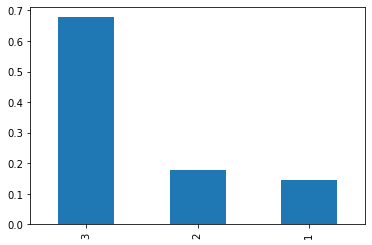

In [188]:
survived = df[(df["Survived"]==0)]
survived["Pclass"].value_counts(normalize=True).plot(kind="bar" )

If you are ready, more groupby exercises can be found in the "Advanded groupby operations" notebook.